<a href="https://colab.research.google.com/github/aaron-v19/practice/blob/main/Neural_Network_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification

## 1. Make classification data and get it ready

In [49]:
import sklearn

In [50]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

# Create Circles
X,y=make_circles(n_samples,
                 noise =0.03,
                 random_state=42)

In [51]:
len(X),len(y)

(1000, 1000)

In [52]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [53]:
 import pandas as pd
 circles=pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "label":y})

In [54]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


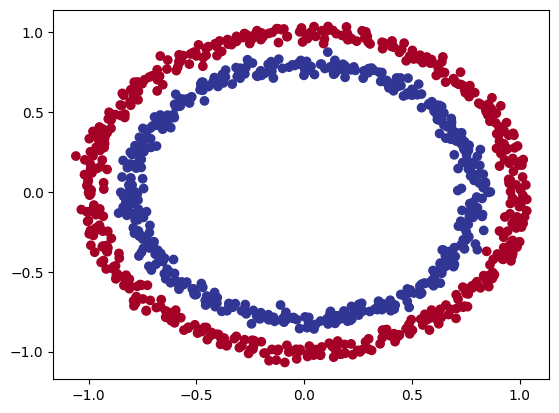

In [55]:
# Visualize, Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

1.1  Check imput and output shape

In [56]:
X.shape,y.shape

((1000, 2), (1000,))

In [57]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [58]:
#view the first sample of featirea and labels
X_sample=X[0]
y_sample=y[0]

print(f" Value of X_sample: {X_sample} and Value of y_sample: {y_sample}")
print(f" Shapes of one sample of X:{X_sample.shape}  and Shapes of one sample of y:{y_sample.shape} ")

 Value of X_sample: [0.75424625 0.23148074] and Value of y_sample: 1
 Shapes of one sample of X:(2,)  and Shapes of one sample of y:() 


In [59]:
import torch
torch.__version__

'2.3.1+cu121'

In [60]:
type(X),type(y), X.dtype,y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [61]:
# turn data into tensor
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [62]:
type(X),X.dtype

(torch.Tensor, torch.float32)

In [63]:
#Split Data into trainig and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42,
                                               shuffle=False)

In [64]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

# 2. Building a Model

Let's build a model to classify the red and blue dots

To do so
1. Setup device agnostic code
2. Construct a model
3. Define a loss function and optimizer
4. Create a training loop

In [65]:
# Import Pytorch and nn
import torch
from torch import nn

In [66]:
# Setup device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

 Now we've setup device agnostic code let's create a model that:

 1. Subclassses `nn.Module`
 2. Cereate 2 `nn.Linear()` layers
 3. Define a `forward()` method
 4. Instantiate an instance of our model and send it to target device

In [67]:
from sklearn import datasets
# 1. Consttruct a model that sublclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.layers to handle the shape of our data
    self.layer_1=nn.Linear(in_features=2,
                           out_features=5)
    self.layer_2=nn.Linear(in_features=5,
                           out_features=1)
    self.two_linear_layers=nn.Sequential(
        nn.Linear(in_features=2,
                  out_features=5),
        nn.Linear(in_features=5,
                  out_features=1)
    )
  def forward(self,x):
    return self.layer_2(self.layer_1(x))  #x-> layer_1-> layer_2-> output


In [79]:
model_0=CircleModelV0().to(device)
model_0,device

(CircleModelV0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
   (two_linear_layers): Sequential(
     (0): Linear(in_features=2, out_features=5, bias=True)
     (1): Linear(in_features=5, out_features=1, bias=True)
   )
 ),
 'cuda')

In [69]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [70]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0')),
             ('two_linear_layers.0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('two_linear_layers.1.

In [71]:
# make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f" lenght and shape untrained \n {len(untrained_preds),untrained_preds.shape}")

print(f" lenght and shape test \n {len(X_test),X_test.shape}")

print(f" First 10 predictions: \n {untrained_preds[:10]} "   )
print(f" First 10 labels: \n {y_test[:10]} "   )

 lenght and shape untrained 
 (200, torch.Size([200, 1]))
 lenght and shape test 
 (200, torch.Size([200, 2]))
 First 10 predictions: 
 tensor([[-0.0946],
        [-0.1374],
        [-0.0939],
        [-0.1950],
        [-0.0847],
        [-0.1806],
        [-0.1492],
        [-0.1161],
        [-0.1046],
        [-0.0872]], device='cuda:0') 
 First 10 labels: 
 tensor([1., 1., 1., 1., 0., 0., 1., 0., 1., 0.]) 


# 2.1 Setup Loss function and optimizer

which loss function is appropriate for our problem

Again .... This is problem specific

For regression MSE  or MAE

For Classification you might want binary cross entropy or categorical cross entropy

Most common used optimizers are SGD and adam , though pytorch provides more

For loss fn we are using `torch.nn.BCEWithLogitsLoss()`

In [72]:
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid activation function built in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [73]:
# Calculate Accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

#3. Train the model

1. Forward Pass
2. Calculate Loss
3. Optimizer Zero grad
4. Loss Backward
5. Optimizer Step

### 3.1 Going from raw logits-> prediction probabilities-> prediction labels

Our model output are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function

Then we can convert our model's prediction  probabilities into prediction labels

In [74]:
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0946],
        [-0.1374],
        [-0.0939],
        [-0.1950],
        [-0.0847]], device='cuda:0')

In [75]:
y_test[:5]

tensor([1., 1., 1., 1., 0.])

In [76]:
# use sigmoid activation functions to our model logits to turn them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4764],
        [0.4657],
        [0.4765],
        [0.4514],
        [0.4788]], device='cuda:0')

For our prediction probabilities , we need to perform range style rounding on them

* `y_pred_probs`>-0.5 , `y=1` (class 1)
* `y_pred_probs`<-0.5 , `y=0` (class 0)

In [77]:
#Find the predicted labels
y_preds=torch.round(y_pred_probs)

#in full (logits->pred probs -> pred labels)
y_preds_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print (torch.eq(y_preds.squeeze(),y_preds_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [33]:
y_test[:5],y_preds[:5]

(tensor([1., 1., 1., 1., 0.]),
 tensor([[0.],
         [0.],
         [0.],
         [1.],
         [0.]], device='cuda:0'))

### 3.2 Training and test loop


In [80]:
epochs =1000
torch.manual_seed(42)

X_train,X_test=X_train.to(device),X_test.to(device)
y_train,y_test=y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  #1. Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss
  loss=loss_fn(y_logits,
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer
  optimizer.zero_grad()

  #4. loss backwards back propogation
  loss.backward()

  #5. Optimizer step( gradient descent)
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    #forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #calculate loss test loss/acc
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    #print progress
    if epoch%50==49:
      print(f"Epoch :{epoch+1} | Loss: {loss:.5f} | Acc: {acc:.2f}%, Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")


Epoch :50 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :100 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :150 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :200 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :250 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :300 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :350 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :400 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :450 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :500 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :550 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :600 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%
Epoch :650 | Loss: 0.69563 | Acc: 49.88%, Test Loss:0.69763, Test Acc:50.50%


##4. Make predictions and evaluate the model

From metrics it looks like our model isn't learning anything

So inspect it

To do so we are importing plot_decicion_boundary

In [81]:
import requests
from pathlib import Path

#Download helper functions from Learn pytorch

if Path("helper_functions.py").is_file():
  print("helper_function.py is already exist")
else:
  print("Download helper_function.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary,plot_predictions

helper_function.py is already exist


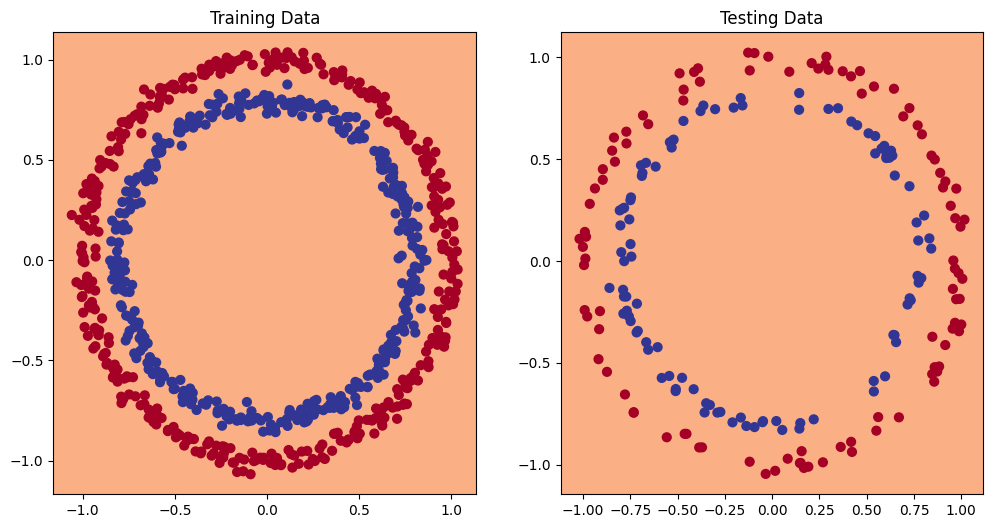

In [82]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_0,X_test,y_test)

#5. Improving a model
* Add more layers-give the model more chances to learn apout patterns
* Add more hidden units
* fit for longer
* Change activation function
* Changing learning rate
* Change loss function
* Change optimizer

These are all froma model's perspective because they deal directly with the moel rather than the data

And because these options are alll values we can change , The are called **hyperparameters**

In [86]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    #z=self.layer_1(x)
    #z=self.layer_2(z)
    #z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))  # this way of writing leverages speed ups where possible behind the scene

model_1=CircleModelV1().to(device)

model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [87]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
                      -0.6657,  0.1642], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
                        0.0338, -0.0559],
                      [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
                        0.0886, -0.2872],
                      [-0.1167,  0.266

In [88]:
#Create a loss fn
loss_fn=nn.BCEWithLogitsLoss()   #sigmoid activation function built in

#create an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)


In [90]:
torch.manual_seed(42)

torch.cuda.manual_seed(42)

epochs=1000

X_train,X_test=X_train.to(device),X_test.to(device)
y_train,y_test=y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward Pass
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. loss function
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss
    test_loss=loss_fn(test_logits,
                      y_test)

    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
  if epoch%100==99:
      print(f"Epoch :{epoch+1} | Loss: {loss:.5f} | Acc: {acc:.2f}%, Test Loss:{test_loss:.5f}, Test Acc:{test_acc:.2f}%")

Epoch :100 | Loss: 0.69288 | Acc: 50.38%, Test Loss:0.69620, Test Acc:47.50%
Epoch :200 | Loss: 0.69265 | Acc: 51.12%, Test Loss:0.69702, Test Acc:44.50%
Epoch :300 | Loss: 0.69254 | Acc: 52.00%, Test Loss:0.69780, Test Acc:43.00%
Epoch :400 | Loss: 0.69250 | Acc: 52.62%, Test Loss:0.69837, Test Acc:41.50%
Epoch :500 | Loss: 0.69248 | Acc: 52.50%, Test Loss:0.69876, Test Acc:40.00%
Epoch :600 | Loss: 0.69248 | Acc: 52.62%, Test Loss:0.69900, Test Acc:40.00%
Epoch :700 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69916, Test Acc:41.00%
Epoch :800 | Loss: 0.69247 | Acc: 52.62%, Test Loss:0.69926, Test Acc:41.00%
Epoch :900 | Loss: 0.69247 | Acc: 52.50%, Test Loss:0.69932, Test Acc:41.00%
Epoch :1000 | Loss: 0.69247 | Acc: 52.75%, Test Loss:0.69936, Test Acc:41.00%


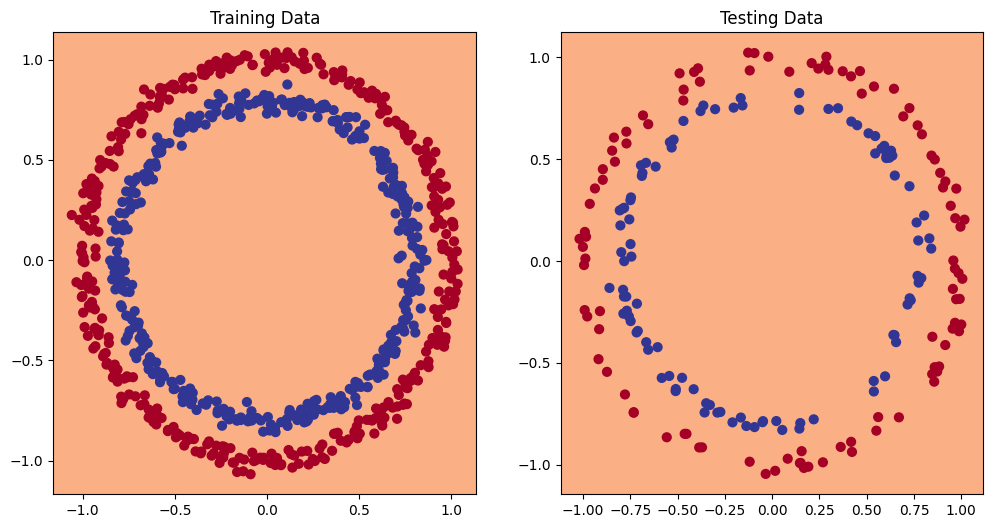

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training Data")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Testing Data")
plot_decision_boundary(model_0,X_test,y_test)